In [41]:
# univariate cnn example
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

**Example Simple**

In [17]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


In [29]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [30]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

**First model**

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


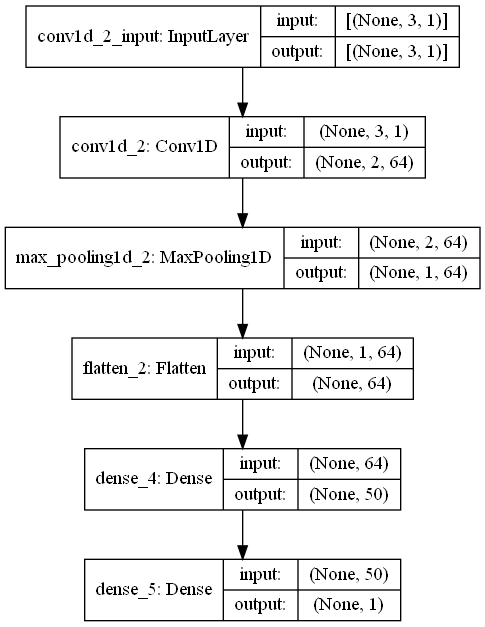

In [46]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [47]:
# define model
# fit model
history = model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.75403]]


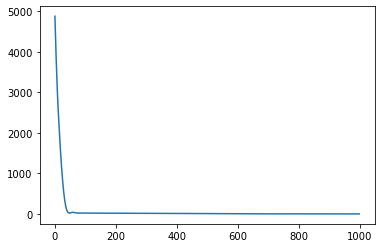

In [55]:
plt.plot(history.history['loss'])

In [57]:
history.history['loss'][-1]

0.026821212843060493

**Google Example**

In [125]:
df = pd.read_csv('Google_Close.csv')
close_seq = df['Close'].values
samples = close_seq.size

In [128]:
df.plot(x='Date', y='Close')

In [70]:
X_Google, Y_Google = split_sequence(close_seq, n_steps)

In [73]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Google = X_Google.reshape((X_Google.shape[0], X_Google.shape[1], n_features))
X_Google.shape
X_Google[-1]

array([[2934.35009766],
       [2856.12011719],
       [2922.2800293 ]])

In [52]:
# define model
# fit model
history_google = model.fit(X_Google, Y_Google, epochs=1000, verbose=0)

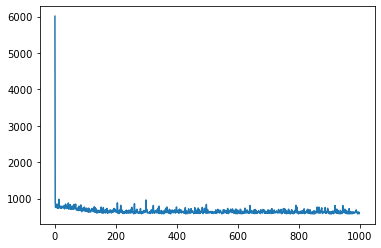

In [54]:
# visualizing losses and accuracy
train_loss = history_google.history['loss']
plt.plot(train_loss)

In [56]:
train_loss[-1]

590.7575073242188

In [78]:
# demonstrate prediction
X_Google_test = close_seq[samples-3:]
X_Google_test = X_Google_test.reshape((1, n_steps, n_features))
yhat_Google = model.predict(X_Google_test, verbose=0)
print(yhat_Google)

[[2871.4387]]


**Verification:** 

In [88]:
import pandas_datareader as data
data_source = 'yahoo'
start_date = '2021-11-30'
end_date = '2022-01-01'
Google_test = data.DataReader('GOOG', data_source, start_date, end_date)

In [89]:
pd.options.plotting.backend = "plotly"
Google_test.plot(y=['Close'])

In [97]:
print("30 November:" ,close_seq[-1])
print("Prediction 1 December:", yhat_Google[0][0])
print('Real value 1 December:', Google_test['Close'].iloc[1])

30 November: 2849.0400390625
Prediction 1 December: 2871.4387
Real value 1 December: 2832.360107421875


**Improving the model**

In [ ]:
model_google = keras.Sequential()
model_google.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model_google.add(keras.layers.MaxPooling1D(pool_size=2))
model_google.add(keras.layers.Flatten())
model_google.add(keras.layers.Dense(50, activation='relu'))
model_google.add(keras.layers.Dense(1))
model_google.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)